<a href="https://colab.research.google.com/github/SusanLL/ClassifyCustomerReviews/blob/main/Estimation_of_Obesity_Levels_Based_On_Eating_Habits_and_Physical_Condition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Estimation of Obesity Levels Based On Eating Habits and Physical Condition**

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'title': 'Dataset f

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/static/public/544/data.csv"
df = pd.read_csv(url)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


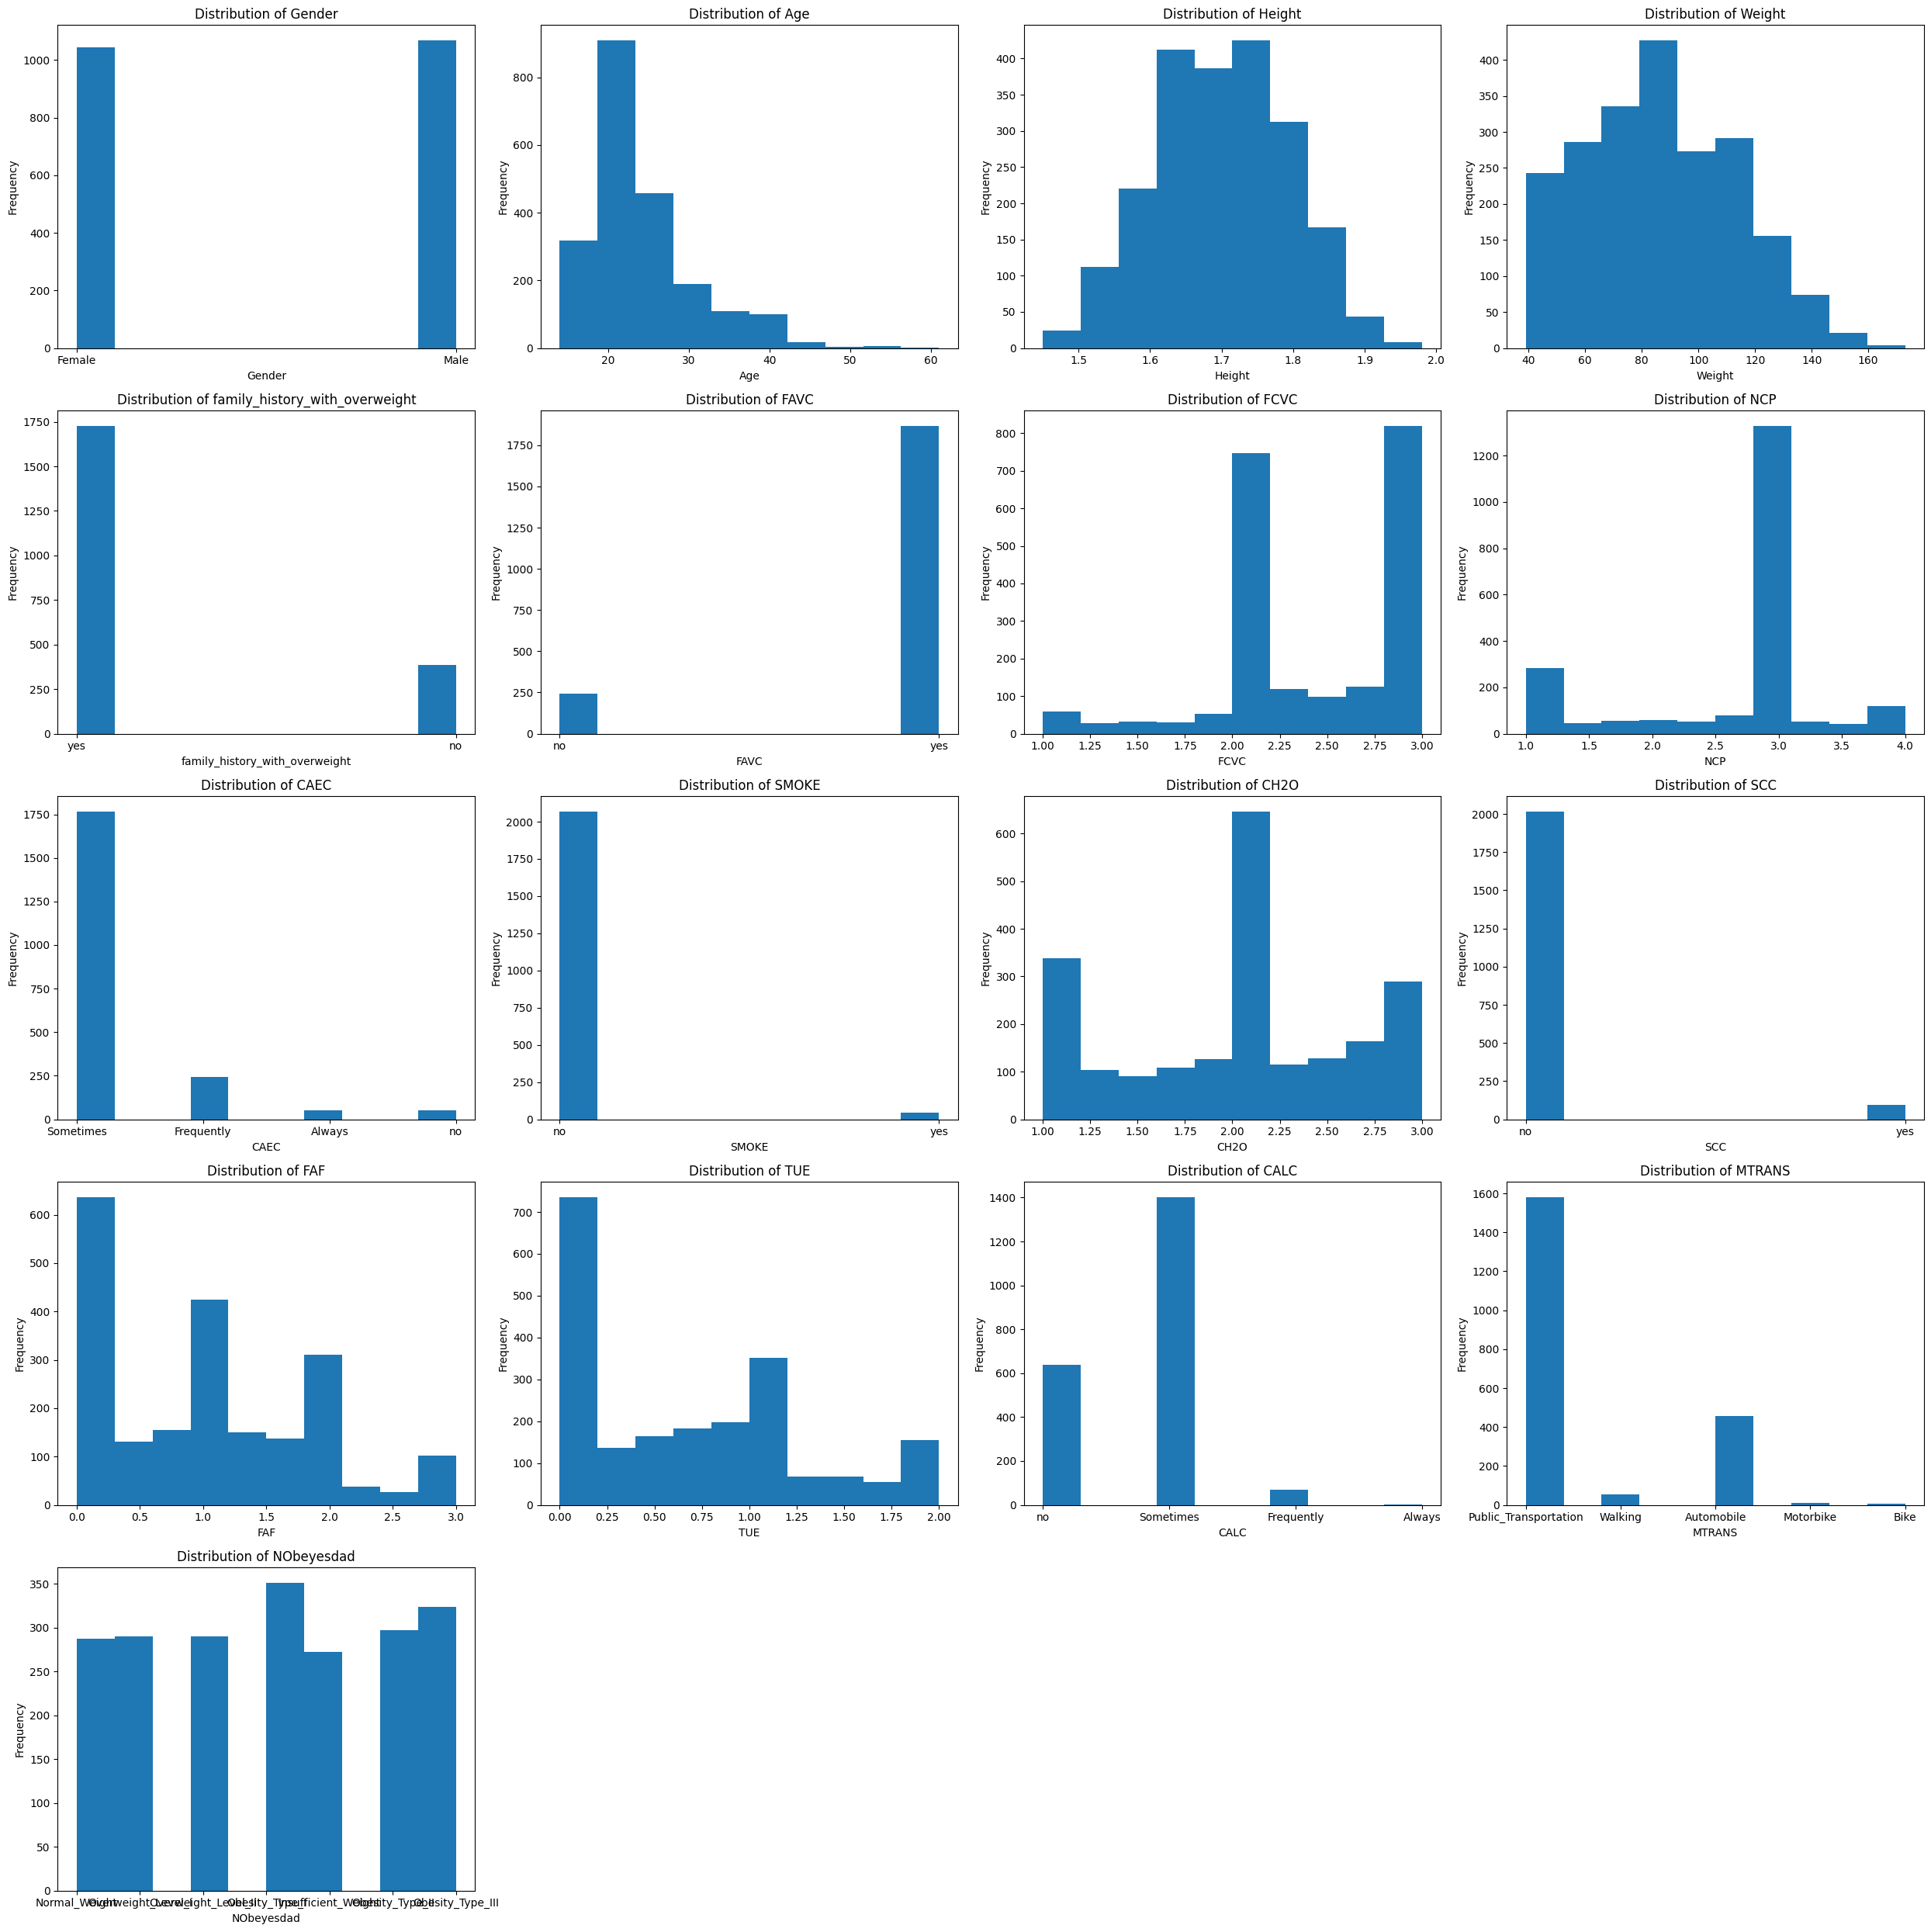

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(5, 4, figsize=(25, 25))
axes = axes.flatten()

# Loop through each column in the DataFrame
for i, column in enumerate(df.columns):
  axes[i].hist(df[column])
  axes[i].set_title(f'Distribution of {column}')
  axes[i].set_xlabel(column)
  axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
  axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Min and Max Age
df['Age'].min(), df['Age'].max()

(14.0, 61.0)

In [ ]:
df['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


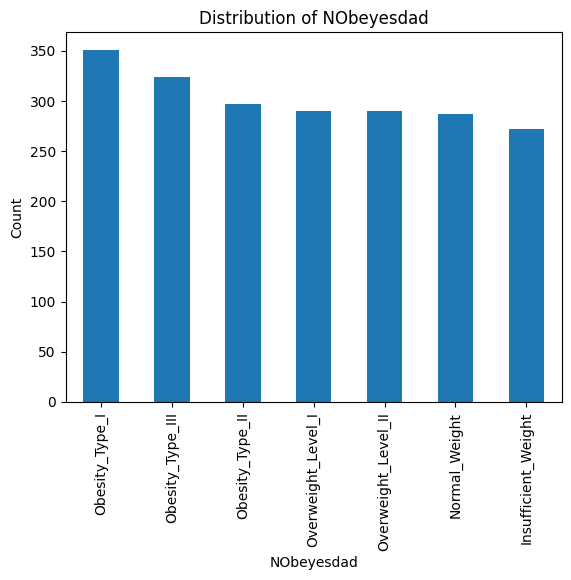

In [ ]:
# Plot of NObeyesdad
import matplotlib.pyplot as plt
df['NObeyesdad'].value_counts().plot(kind='bar')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.title('Distribution of NObeyesdad')
plt.show()


Convert the object to number

In [ ]:
# Convert the NObeyesdad to general and numaric value
df['NObeyesdad'] = df['NObeyesdad'].replace({'Insufficient_Weight': 0,
                                             'Normal_Weight': 1,
                                             'Overweight_Level_I': 2,
                                             'Overweight_Level_II': 2,
                                             'Obesity_Type_I': 3,
                                             'Obesity_Type_II': 3,
                                             'Obesity_Type_III': 3})

In [ ]:
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

In [ ]:
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'yes': 1, 'no': 0})

In [ ]:
df['FAVC'] = df['FAVC'].replace({'yes': 1, 'no': 0})

In [ ]:
df['CAEC'].value_counts()

,count
CAEC,
Sometimes,1765
Frequently,242
Always,53
no,51


In [ ]:
df['CAEC'] = df['CAEC'].replace({'no': 0,
                                 'Sometimes': 1,
                                 'Frequently': 2,
                                 'Always': 3})

In [ ]:
df['SMOKE'] = df['SMOKE'].replace({'yes': 1, 'no': 0})

In [ ]:
df['SCC'] = df['SCC'].replace({'yes': 1, 'no': 0})

In [ ]:
df['CALC'] = df['CALC'].replace({'no': 0,
                                 'Sometimes': 1,
                                 'Frequently': 2,
                                 'Always': 3})

In [ ]:
df['MTRANS'] = df['MTRANS'].replace({'Public_Transportation': 0,
                                     'Walking': 1,
                                     'Automobile': 2,
                                     'Motorbike': 3,
                                     'Bike': 4})

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,1,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,2


In [ ]:
# Change family_history_with_overweight	to FHWO
df.rename(columns={'family_history_with_overweight': 'FHWO'}, inplace=True)

In [ ]:
# Check for null values, missing data, and any data inconsistency
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
FHWO,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [ ]:
# The output summary of attributes
df.describe()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,0.488394,2.066793
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.868475,1.052549
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,0.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,0.000000,2.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,1.000000,3.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000


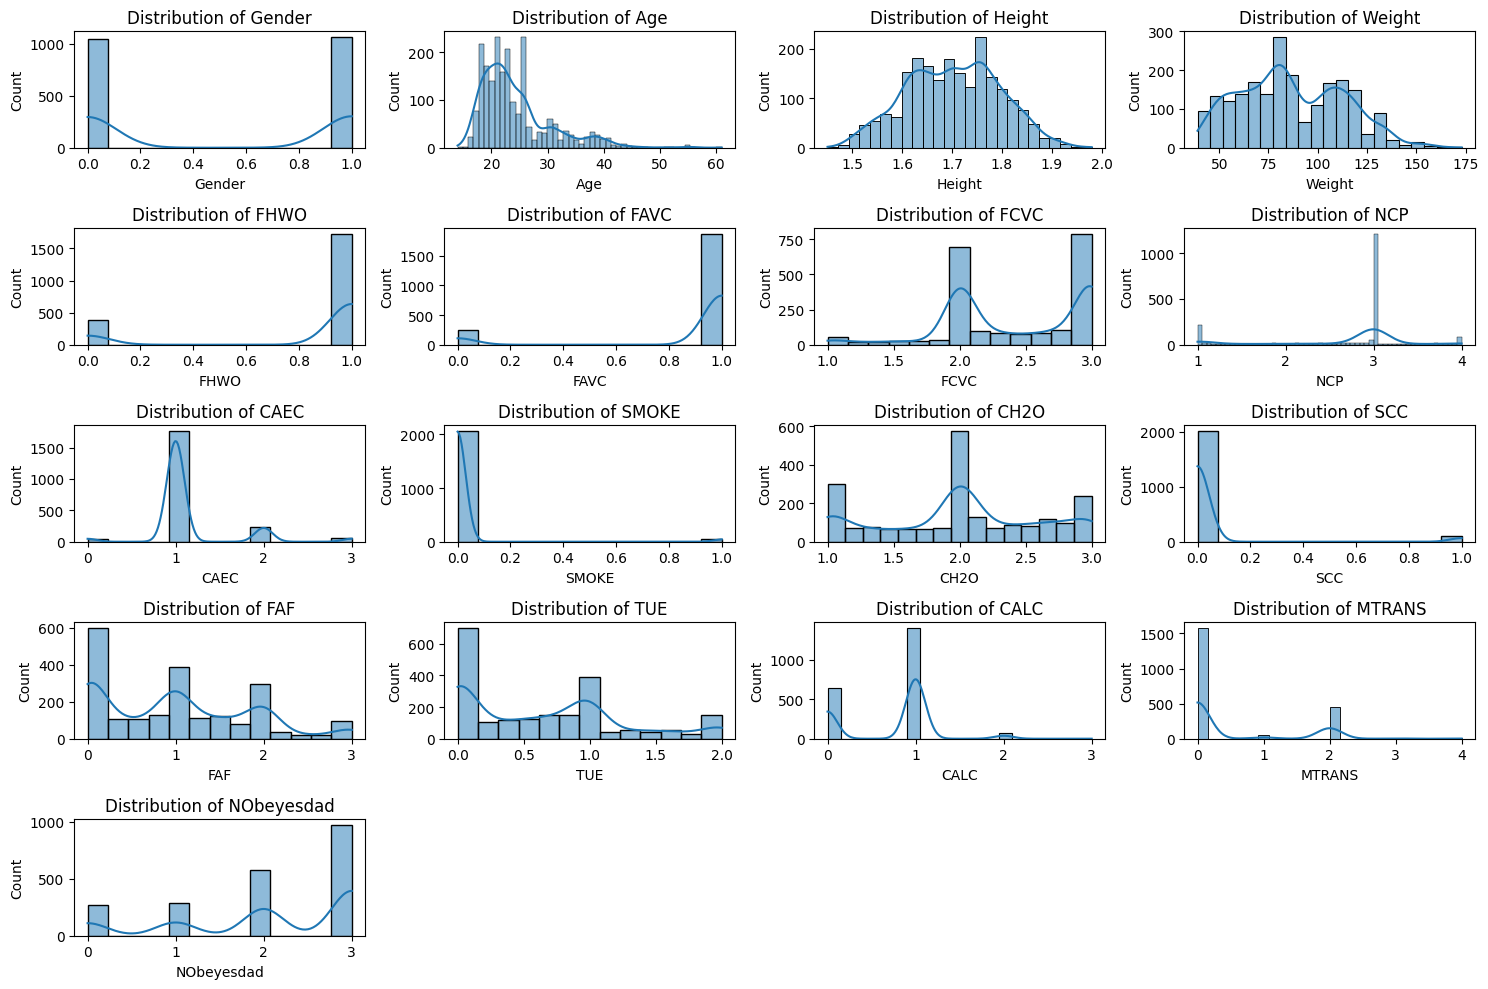

In [ ]:
# Check if the attributes are normally distributed

import matplotlib.pyplot as plt
import seaborn as sns
# Select the numerical attributes
numerical_attributes = df.select_dtypes(include=['number'])

# Create histograms for each numerical attribute
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_attributes.columns):
  plt.subplot(5, 4, i + 1)
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


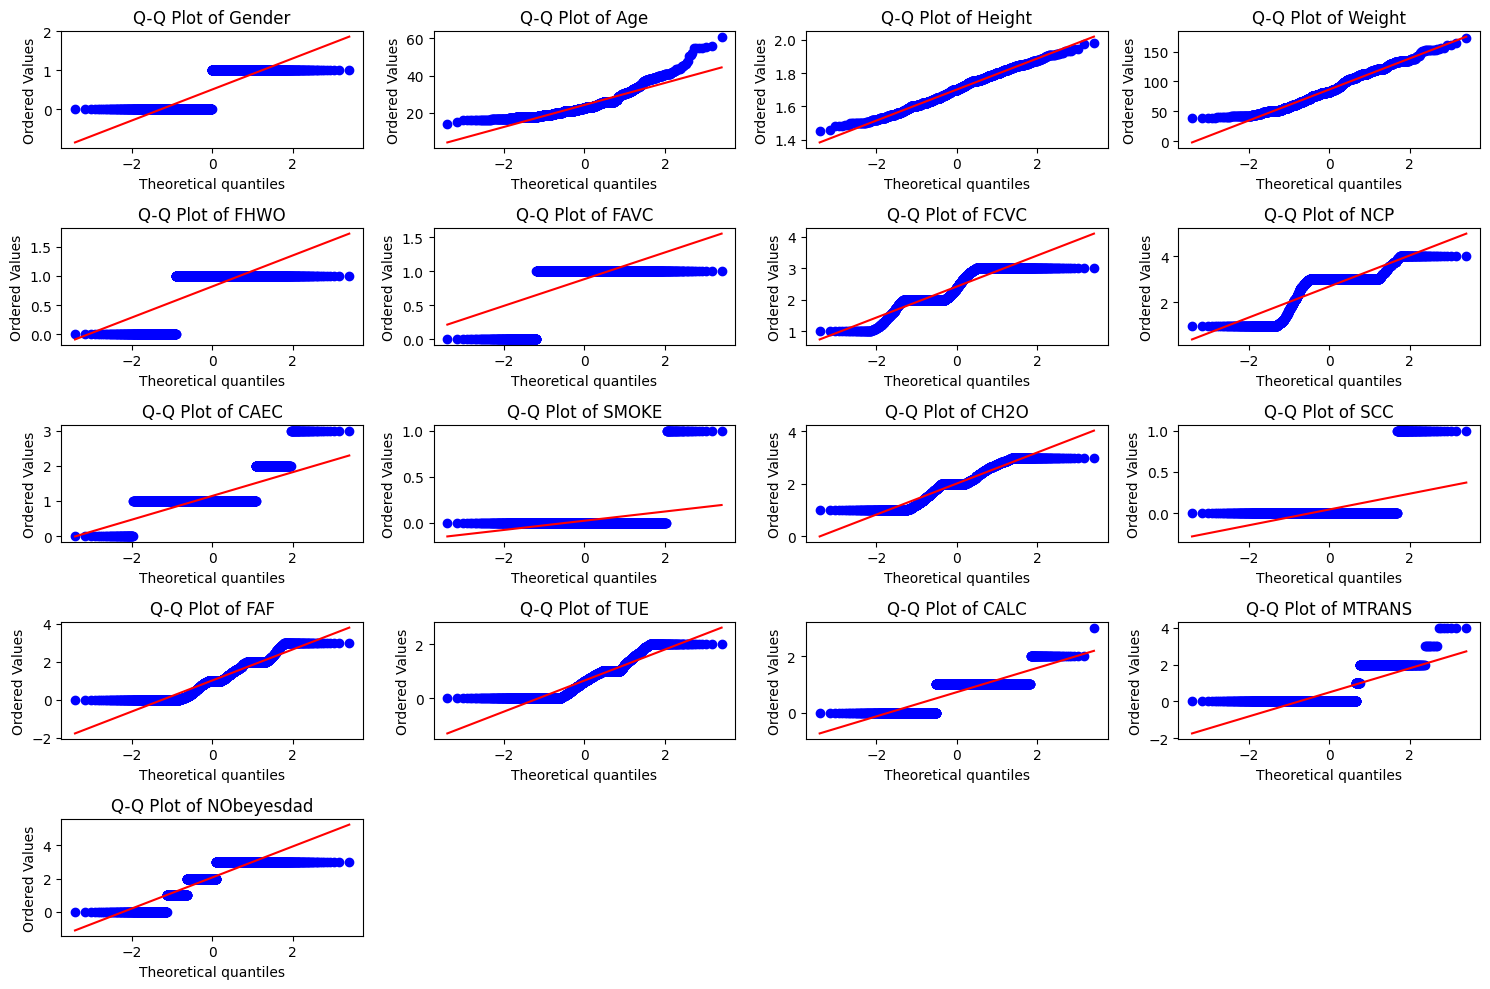

In [ ]:
# Create a qq-plot

import scipy.stats as stats

# Select the numerical attributes
numerical_attributes = df.select_dtypes(include=['number'])

# Create Q-Q plots for each numerical attribute
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_attributes.columns):
  plt.subplot(5, 4, i + 1)
  stats.probplot(df[col], dist="norm", plot=plt)
  plt.title(f'Q-Q Plot of {col}')
plt.tight_layout()
plt.show()


Base on the observation of histograms and qq-plot. The attributes are not normally distributed. Here some reasons:

Categorical Variables: Some attributes (like Gender, Family History with Overweight, FAVC, SMOKE) are categorical and do not follow a continuous or normal distribution. These are binary or multi-class attributes that don't exhibit the bell-shaped curve typical of normal distribution.

Skewed Data: Attributes like SMOKE, SCC, and MTRANS show significant skewness (either left or right). This often happens when the majority of data points lie towards one end of the distribution, creating a heavy tail.

Multimodal Distributions: Some attributes (like CAEC, CH2O, and TUE) show multiple peaks, indicating a multimodal distribution. This suggests that there may be subgroups within the data that follow different distributions.

Outliers: Attributes like Weight, SCC, and FAF have outliers, which can distort the distribution and prevent it from being normal. Outliers pull the tail of the distribution, creating skewness.

Zero-Inflated Data: Some attributes, such as SMOKE and FAF, have a large proportion of zero values, which can lead to a heavily skewed distribution and prevent normality.

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = df['NObeyesdad'] # target
X = df.drop('NObeyesdad', axis=1) # feature
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.describe()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,2.111000e+03,2111.000000,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03
mean,-5.385449e-17,0.000000,-5.385449e-16,-5.385449e-16,-8.078174e-17,1.346362e-16,-1.346362e-17,4.964711e-16,-1.884907e-16,-2.019544e-17,1.077090e-16,-6.731812e-17,2.692725e-17,-1.346362e-17,5.048859e-17,1.750271e-16
std,1.000237e+00,1.000237,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00
min,-1.011914e+00,-1.625448,-2.698006e+00,-1.817304e+00,-2.117337e+00,-2.759769e+00,-2.658379e+00,-2.167023e+00,-2.435125e+00,-1.459003e-01,-1.644905e+00,-2.182720e-01,-1.188039e+00,-1.080625e+00,-1.419172e+00,-5.624914e-01
25%,-1.011914e+00,-0.688066,-7.683883e-01,-8.062914e-01,4.722913e-01,3.623491e-01,-7.850187e-01,-3.456952e-02,-3.003456e-01,-1.459003e-01,-6.905894e-01,-2.182720e-01,-1.041630e+00,-1.080625e+00,-1.419172e+00,-5.624914e-01
50%,9.882266e-01,-0.241897,-1.263207e-02,-1.369510e-01,4.722913e-01,3.623491e-01,-6.283450e-02,4.041527e-01,-3.003456e-01,-1.459003e-01,-1.307326e-02,-2.182720e-01,-1.210937e-02,-5.341135e-02,5.211595e-01,-5.624914e-01
75%,9.882266e-01,0.265964,7.159595e-01,7.960531e-01,4.722913e-01,3.623491e-01,1.088342e+00,4.041527e-01,-3.003456e-01,-1.459003e-01,7.659959e-01,-2.182720e-01,7.718565e-01,5.619968e-01,5.211595e-01,5.892248e-01
max,9.882266e-01,5.782584,2.983646e+00,3.300136e+00,4.722913e-01,3.623491e-01,1.088342e+00,1.689740e+00,3.969213e+00,6.853997e+00,1.618759e+00,4.581439e+00,2.339750e+00,2.204618e+00,4.401822e+00,4.044373e+00


In [ ]:
sns.pairplot(df)

<Axes: >

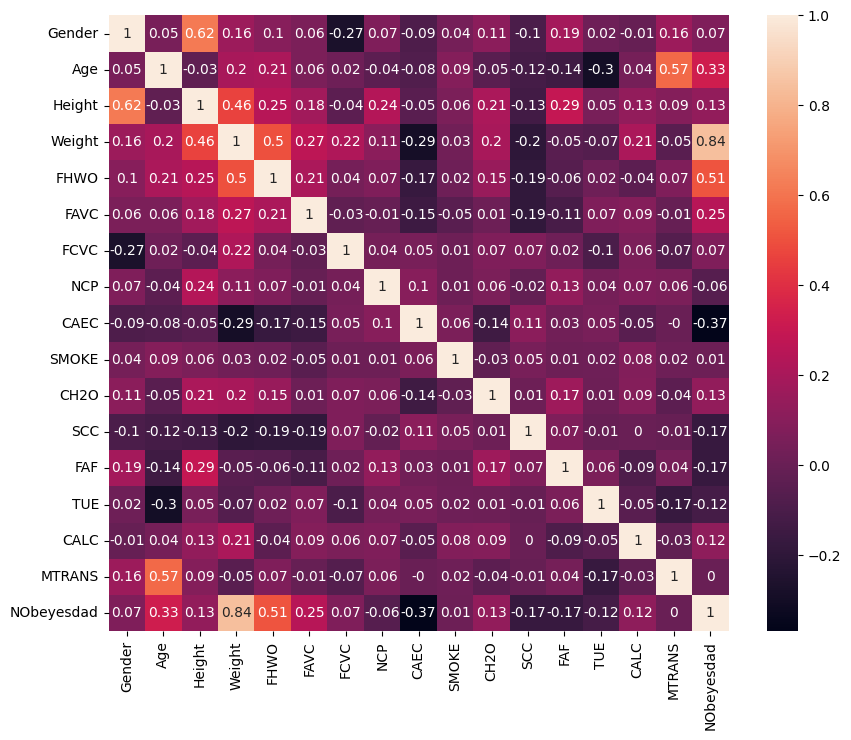

In [ ]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True)

# **SGDRegressor**

In [ ]:
correlation_matrix = df.corr()
correlation_with_quality = correlation_matrix['NObeyesdad'].abs().sort_values(ascending=False)
top_variables = correlation_with_quality[1:7].index.tolist()
print(top_variables)

['Weight', 'FHWO', 'CAEC', 'Age', 'FAVC', 'FAF']


In [ ]:
# top 6 variables that are most closely correlated with the quality variable
features = top_variables

In [ ]:
X = X_scaled[features]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

In [ ]:
X_train.shape, X_test.shape

((1477, 6), (634, 6))

In [ ]:
param_grid = {
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'max_iter': [1000, 2000, 5000],
    'loss': ['squared_error', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
}

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
sgd = SGDRegressor()
grid_search = GridSearchCV(sgd, param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['squared_error', 'huber',
                                  'epsilon_insensitive'],
                         'max_iter': [1000, 2000, 5000],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [ ]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 'invscaling', 'loss': 'squared_error', 'max_iter': 2000, 'penalty': 'l2'}
Best score:  0.7688718660240648


In [ ]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(learning_rate='invscaling', loss='squared_error', max_iter=5000, penalty='l2')
sgd.fit(X_train, y_train)

SGDRegressor(max_iter=5000)

In [ ]:
sgd.coef_

array([ 0.76513501,  0.10591933, -0.14879662,  0.14116381, -0.0102246 ,
       -0.10666038])

In [ ]:
sgd.intercept_

array([2.05738101])

In [ ]:
sgd.score(X_test, y_test)

0.7520567089790219

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
mse, mae, ev, r2

(0.2817122992381547,
 0.4213758793996693,
 0.7525670526231979,
 0.7520567089790219)

# **OLS Using StatsModels Library**

In [ ]:
import statsmodels.api as sm

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,1,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,2


In [ ]:
X = df.drop('NObeyesdad', axis=1) # feature
y = df['NObeyesdad'] # target

In [ ]:
top_variables

['Weight', 'family_history_with_overweight', 'CAEC', 'Age', 'FAVC', 'FAF']

In [ ]:
X = X[features]

In [ ]:
X.head()

,Weight,family_history_with_overweight,CAEC,Age,FAVC,FAF
0,64.0,1,1,21.0,0,0.0
1,56.0,1,1,21.0,0,3.0
2,77.0,1,1,23.0,0,2.0
3,87.0,0,1,27.0,0,2.0
4,89.8,0,1,22.0,0,0.0


In [ ]:
y.head()

,NObeyesdad
0,1
1,1
2,1
3,2
4,2


In [ ]:
# take away FAVC
X = X.drop('FAVC', axis=1)

In [ ]:
X = sm.add_constant(X)
X.head()

,const,Weight,family_history_with_overweight,CAEC,Age,FAF
0,1.0,64.0,1,1,21.0,0.0
1,1.0,56.0,1,1,21.0,3.0
2,1.0,77.0,1,1,23.0,2.0
3,1.0,87.0,0,1,27.0,2.0
4,1.0,89.8,0,1,22.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

In [ ]:
mod = sm.OLS(y_train, X_train)

In [ ]:
res = mod.fit()

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             NObeyesdad   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1011.
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        05:43:56   Log-Likelihood:                -1062.6
No. Observations:                1477   AIC:                             2137.
Df Residuals:                    1471   BIC:                             2169.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
y_test_predict = res.predict(X_test)

In [ ]:
sm.tools.eval_measures.rmse(y_test, y_test_predict)

0.5305103656935403

R-squared is 0.775. This mean 77.5% of the variation in the obesity levels is explained by the independent variables in this model. This is a strong fit, indicating that the model does a good job of explaining the relationship between the predictors and obesity.

Adjusted R-squared is 0.774. This mean after adjusted for the number of predictors, this remains at 0.774, showing that the model generalizes well without overfitting, as adding more variables doesn't significantly inflate the R-squared.

F-statistic is 1011. This measures the overall significance of the model. A very high F-statistic indicates that the independent variables collectively have a statistically significant effect on the dependent variable.
Prob (F-statistic) is 0.000. This means the p-value is extremely low, confirming that the model as a whole is statistically significant.

1. Weight_Coef =	0.0290. A unit increase in weight leads to a 0.029 increase in obesity levels, holding other factors constant.

2. Family history with overweight_Coef	= 0.2636. If an individual has a family history of overweight, obesity levels increase by 0.2636 on average.

3. CAEC_Coef =	-0.2957. Higher calorie consumption (CAEC) is associated with a 0.2957 decrease in obesity levels. This seems counterintuitive unless the variable is coded inversely.

4. Age_Coef =	0.0218. For each additional year in age, obesity levels increase by 0.0218 on average.

5. FAF_Coef =	-0.1276	An increase in physical activity decreases obesity levels by 0.1276 on average.

Standard error of 0.000 indicates high precision for the effect of weight, Family history with overweight, CAEC, Age, and FAF on obesity levels.
I drop the FAVC since the std err value is high, which indicate low precision.

Every variable in this model is statistically significant, as their p-values are all below 0.05.

In conclusion, the model explains 77.5% of the variation in obesity levels, with statistically significant predictors such as weight, family history of overweight, age, calorie consumption, and physical activity.
Diagnostics like normality of residuals, no autocorrelation, and a good fit suggest that this model is robust.